In [1]:
#使用 OpenCV 的 Image Basic 
import cv2 
image = cv2.imread('D:/xuexi/uie.jpg')
image =cv2.resize(image,(224,224)) 
image = cv2.flip(image,0) 
cv2.imshow('Image',image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [2]:
#图像转换为灰度和RGB 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 

In [3]:
import numpy as np 
# Create a blank image
blank_img = np.zeros(shape=(512,512,3),dtype=np.int16)
# Draw rectangle on image
cv2.rectangle(blank_img,pt1=(384,0),pt2=(510,128),color=(0,255,0),thickness=5)
# Draw circle on image
cv2.circle(img=blank_img, center=(100,100), radius=50, color=(255,0,0), thickness=5)
# Draw line on image
cv2.line(blank_img,pt1=(0,0),pt2=(511,511),color=(102, 255, 255),thickness=5)
# Put text on image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(blank_img,
      text='Hello',
      org=(10,500), 
      fontFace=font,
      fontScale= 4,
      color=(255,255,255),
      thickness=2,
      lineType=cv2.LINE_AA)
      
# Display the image
cv2.imshow("blank_img",blank_img)

In [4]:
#使用opencv进行图像预处理
#HSL 和 HSV：HSL（色相、饱和度、亮度）和 HSV（色相、饱和度、值）是 RGB 颜色模型的替代表示形式。OpenCV 可以在不同的色彩空间之间转换图像。
def color_space_conversion():
    img = cv2.imread('uie.jpg') 
    hsl_img = cv2.cvtColor(img,cv2.COLOR_BGR2HLS) 
    cv2.imshow('HSL Image',hsl_img) 
    hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
    cv2.imshow('HSV Image',hsv_img) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
if __name__ == '__main__':
    color_space_conversion()

In [5]:
#混合图像  混合会合并两个图像，每个图像使用特定的权重，两个图像加权和
def blend_images():
    img1 = cv2.imread('uie.jpg') 
    img2 = cv2.imread('uiw.jpg') 
    img1 = cv2.resize(img1,(500,500)) 
    img2 = cv2.resize(img2,(500,500)) 
    blended = cv2.addWeighted(img1,0.7,img2,0.3,0) 
    cv2.imshow('Blended Image',blended) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
if __name__ == "__main__":
    blend_images()

In [7]:
#图像阈值  阈值从灰度图像创建二进制图像
def image_threshold():
    img = cv2.imread('uie.jpg',0) 
    _,binary = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 
    cv2.imshow('Binary Image',binary) 
    adaptive_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) 
    cv2.imshow('Adaptive Mean Thresholding', adaptive_mean)
    adaptive_gaussian = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cv2.imshow('Adaptive Gaussian Thresholding', adaptive_gaussian)
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
if __name__ == "__main__":
    image_threshold()


In [8]:
#模糊或平滑 模糊处理减少图像中的杂色和细节
def blur_image():
    img = cv2.imread('uie.jpg') 
    average_blur = cv2.blur(img,(5,5)) 
    cv2.imshow('Average Blurring',average_blur) 
    gaussian_blur = cv2.GaussianBlur(img,(5,5),0) 
    cv2.imshow('Gaussian Blurring', gaussian_blur)
    median_blur = cv2.medianBlur(img, 5)
    cv2.imshow('Median Blurring', median_blur)
    bilateral_blur = cv2.bilateralFilter(img, 9, 75, 75)
    cv2.imshow('Bilateral Blurring', bilateral_blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
if __name__ == "__main__":
    blur_image()

In [9]:
#形态学操作 结构化应用图像
def morphological_operations():
    img = cv2.imread('uie.jpg', 0)  # Load as grayscale
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    dilation = cv2.dilate(img, kernel, iterations=1)
    cv2.imshow('Dilation', dilation)
    erosion = cv2.erode(img, kernel, iterations=1)
    cv2.imshow('Erosion', erosion)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    cv2.imshow('Opening', opening)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    cv2.imshow('Closing', closing)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    morphological_operations()

In [10]:
#梯度：渐变用于查找图像中的边缘。常用方法包括 Sobel、Scharr 和 Laplacian。
def image_gradients():
    img = cv2.imread('uie.jpg', 0)  # Load as grayscale
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    cv2.imshow('Sobel X', sobelx)
    cv2.imshow('Sobel Y', sobely)
    cv2.imshow('Laplacian', laplacian)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    image_gradients()

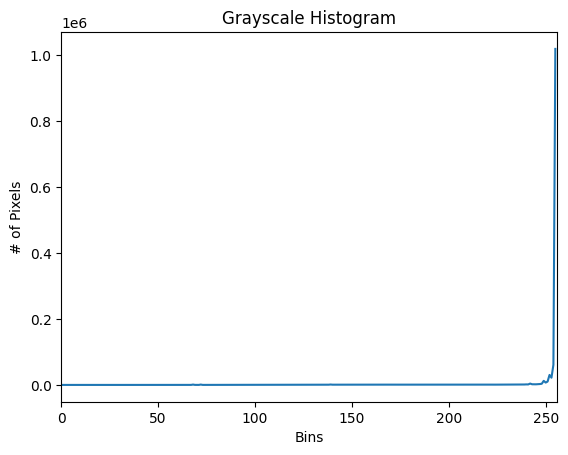

In [12]:
#直方图：直方图用于表示图像中像素强度的分布。它们可用于对比度调整、阈值设置等。
import matplotlib.pyplot as plt

def image_histogram():
    img = cv2.imread('uie.jpg', 0)  # Load as grayscale
    # Calculate histogram
    hist = cv2.calcHist([img],
            channels=[0],
            mask=None,
            histSize=[256],
            ranges=[0,256])
    # Plot histogram
    plt.figure()
    plt.title('Grayscale Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()
if __name__ == "__main__":
    image_histogram()

In [13]:
import cv2

# Connects to your computer's default camera
cap = cv2.VideoCapture(0)
while True:
    
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    
    # This command let's us quit with the "q" button on a keyboard.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# MACOS AND LINUX: *'XVID' (MacOS users may want to try VIDX as well just in case)
# WINDOWS *'DIVX'
writer = cv2.VideoWriter('../DATA/student_capture.mp4', cv2.VideoWriter_fourcc(*'DIVX'),25, (width, height))
## This loop keeps recording until you hit Q or escape the window
## You may want to instead use some sort of timer, like from time import sleep and then just record for 5 seconds.
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Write the video
    writer.write(frame)
    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
writer.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import time

# Same command function as streaming, its just now we pass in the file path, nice!
cap = cv2.VideoCapture('../DATA/video_capture.mp4')
# FRAMES PER SECOND FOR VIDEO
fps = 25
# Always a good idea to check if the video was acutally there
# If you get an error at thsi step, triple check your file path!!
if cap.isOpened()== False: 
    print("Error opening the video file. Please double check your file path for typos. Or move the movie file to the same location as this script/notebook")
    
# While the video is opened
while cap.isOpened():
    
    # Read the video file.
    ret, frame = cap.read()
    
    # If we got frames, show them.
    if ret == True:
        
         # Display the frame at same frame rate of recording
        # Watch lecture video for full explanation
        time.sleep(1/fps)
        cv2.imshow('frame',frame)
 
        # Press q to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            
            break
 
    # Or automatically break this whole loop if the video is over.
    else:
        break
        
cap.release()
# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
# The Full Image to Search
full = cv2.imread('dog.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

# The Template to Match
face= cv2.imread('dog_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)
    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)
    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)
    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\\n')
    print('\\n') 

In [14]:
import cv2
import numpy as np

def template_matching():
    img = cv2.imread('uie.jpg')
    template = cv2.imread('uiw.jpg', 0)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
    cv2.imshow('Detected', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    template_matching()

In [15]:
def corner_detection():
    img = cv2.imread('uie.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    img[corners > 0.01 * corners.max()] = [0, 0, 255]
    cv2.imshow('Corners', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    corner_detection()

In [16]:
#边缘检测
def edge_detection():
    img = cv2.imread('uie.jpg', 0)
    edges = cv2.Canny(img, 100, 200)
    cv2.imshow('Edges', edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    edge_detection()

In [17]:
#网格检测：网格检测可以结合使用边缘检测和 Hough Line Transform 来实现。
def grid_detection():
    img = cv2.imread('uie.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    cv2.imshow('Grid Detection', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    grid_detection()

In [18]:
found, corners = cv2.findChessboardCorners(img,(7,7))

img_copy = img.copy()
cv2.drawChessboardCorners(img_copy, (7, 7), corners, found)
plt.imshow(img_copy)
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)
dbg_image_circles = dots.copy()
cv2.drawChessboardCorners(dbg_image_circles, (10, 10), corners, found)
plt.imshow(dbg_image_circles)

NameError: name 'img' is not defined

In [19]:
#轮廓：等值线是沿边界连接所有具有相同颜色或强度的连续点的曲线。
def find_contours():
    img = cv2.imread('uie.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
    cv2.imshow('Contours', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    find_contours()

In [20]:
#特征匹配：特征匹配涉及检测图像中的关键点和描述符，并在另一个图像中查找相似特征。
def feature_matching():
    img1 = cv2.imread('uie.jpg', 0)
    img2 = cv2.imread('uiw.jpg', 0)
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    cv2.imshow('Feature Matching', img3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    feature_matching()

In [21]:
#分水岭算法：流域算法 用于图像分割。它将像素值视为地形表面。
def watershed_algorithm():
    img = cv2.imread('uie.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]
    cv2.imshow('Watershed', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    watershed_algorithm()

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_face(img):
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    
img = cv2.imread('img.jpg',0)
result = detect_face(img)
plt.imshow(result, cmap='gray')

使用 OpenCV 进行对象跟踪
Optical Flow 对于跨帧跟踪特征点非常有用。
Mean Shift 适用于跟踪具有已知外观模型的对象。
Cam Shift 通过动态调整窗口大小和方向来改进 Mean Shift。
Tracking API 为各种高级跟踪算法提供了高级接口。
光流：是视觉场景中物体、表面和边缘的表观运动模式。OpenCV 提供了多种光流方法。在这里，我们将使用 Lucas-Kanade 方法。

In [ ]:
import cv2
import numpy as np

def optical_flow():
    cap = cv2.VideoCapture('video.mp4')

    # Take first frame
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

    # Parameters for lucas kanade optical flow
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))

    # Select a ROI
    bbox = cv2.selectROI("Frame", old_frame, fromCenter=False, showCrosshair=True)
    x, y, w, h = bbox
    p0 = cv2.goodFeaturesToTrack(old_gray[y:y+h, x:x+w], mask=None, **lk_params)

    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculate optical flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        # Select good points
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
            frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
        img = cv2.add(frame, mask)

        cv2.imshow('frame', img)
        if cv2.waitKey(1) & 0xFF == 27:
            break

        # Update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cv2.destroyAllWindows()
    cap.release()

if __name__ == "__main__":
    optical_flow()


In [ ]:
#Mean Shift：是一种可用于对象跟踪的聚类算法。OpenCV 提供了 cv2.meanShift 函数来执行 Mean Shift 跟踪。
import cv2

def mean_shift():
    cap = cv2.VideoCapture('video.mp4')

    # Take first frame of the video
    ret, frame = cap.read()
    bbox = cv2.selectROI(frame, False)

    # Setup the termination criteria, either 10 iteration or move by at least 1 pt
    term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (0, 60, 32), (180, 255, 255))

        ret, bbox = cv2.meanShift(mask, bbox, term_crit)

        x, y, w, h = bbox
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.imshow('MeanShift Tracking', frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    mean_shift()

In [ ]:
#Cam Shift （Continuously Adaptive Mean Shift）：是 Mean Shift 的增强版本，它可以调整窗口大小和方向。
import cv2

def cam_shift():
    cap = cv2.VideoCapture('video.mp4')

    # Take first frame of the video
    ret, frame = cap.read()
    bbox = cv2.selectROI(frame, False)

    # Setup the termination criteria, either 10 iteration or move by at least 1 pt
    term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, (0, 60, 32), (180, 255, 255))

        ret, bbox = cv2.CamShift(mask, bbox, term_crit)

        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        cv2.polylines(frame, [pts], True, (0, 255, 0), 2)
        cv2.imshow('CamShift Tracking', frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    cam_shift()

In [ ]:
import cv2

def tracking_api():
    cap = cv2.VideoCapture('video.mp4')

    # Read the first frame
    ret, frame = cap.read()
    bbox = cv2.selectROI(frame, False)

    # Initialize tracker with first frame and bounding box
    tracker = cv2.TrackerCSRT_create()
    tracker.init(frame, bbox)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Update tracker
        success, bbox = tracker.update(frame)

        if success:
            x, y, w, h = [int(v) for v in bbox]
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else:
            cv2.putText(frame, "Tracking failure detected", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)

        cv2.imshow('Tracking API', frame)

        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()
if __name__ == "__main__":
    tracking_api()